In [1]:
#Importing packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [33]:
df = pd.read_csv('csv/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [36]:
# Drop null valuse and rest the number of indexes

df = df.dropna()
df = df.reset_index(drop=True)

In [40]:
# Change the types of some float columns to int

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [43]:
# Drop any Duplicates

duplicate = df[df.duplicated()]
duplicate

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [44]:
# So, There is not any duplicate rows

C:\Users\fadak\.conda\envs\new_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


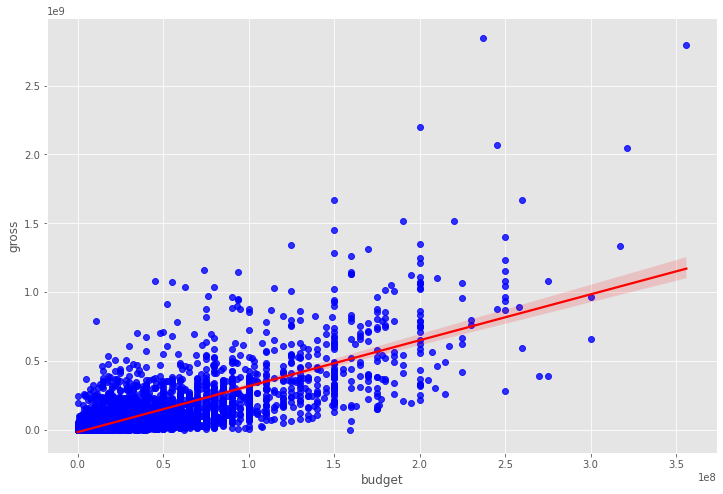

In [52]:
# plotting the scatter of Budget vs gross and its linear regression

sns.regplot(df['budget'], df['gross'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.show()

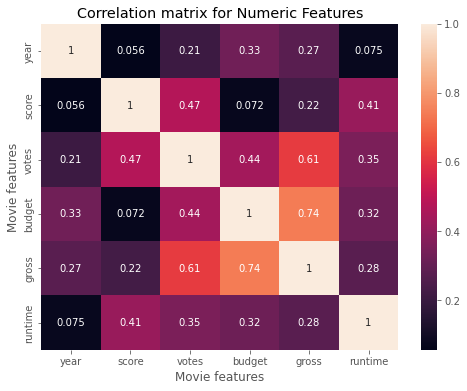

In [59]:
# Finding out the corrolation matrix and Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [66]:
# In this part we want to numerized the columns with str values
df_numerized = df
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
5417,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
5418,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
5419,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


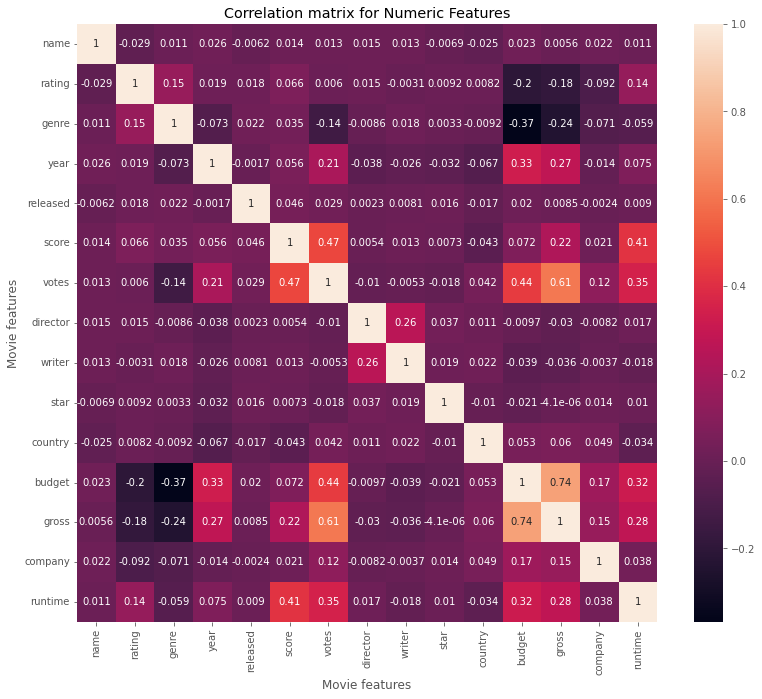

In [69]:
# Finding out the corrolation matrix and Heatmap for every features of dataset
plt.figure(figsize=(13,11))
sns.heatmap(df_numerized.corr(), annot=True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [70]:
# At the end of this analyzing, it is found that there is a strong corrolation between budget, gross and vote